# Modeling and predict of the sine function
## Quantum Machine Learning
### Pedro Pablo Tejero Romero

The objective of this notebook is to demonstrate the application of quantum machine learning techniques using PennyLane. The notebook showcases the modeling and prediction of the sine function using a quantum machine learning model, and evaluates the performance of the model on different training data sizes. The notebook also includes the calculation of the Huber loss, visualization of the results, and analysis of the accuracy of the predictions.

In [125]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [126]:
# Generate 3 data samples of 5, 50 and 500 elements for training
X = [np.linspace(0, 2 * np.pi, 5 * (10 ** i)) for i in range(3)]
for x in X:
    x.requires_grad = False
# Generate corresponding sine values
Y = [np.sin(x) for x in X]

In [127]:
# Generate 10 random data samples for testing
x_test = np.random.uniform(0, 2*np.pi, 10)
y_test = np.sin(x_test)

In [128]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def circuit(datapoint, params):
    """
    Circuit to encode a datapoint x into a quantum state and apply a variational circuit.
    
    Args:
        datapoint (float): A single datapoint to encode
        params (array[float]): Array of parameters for the variational circuit
        
    Returns:
        float: expectation value of PauliX operator
    """
    # Encoding of input
    qml.Hadamard(wires=0)
    qml.RZ(datapoint, wires=0)

    # Variational circuit
    qml.Rot(*params, wires=0)
    
    return qml.expval(qml.PauliX(0))

There are some ways to construct this circuit. I chose this one because it doesn't seem the most trivial, and I believe it doesn't appear in other Pennylane tutorials about the sine function.

The approach I've used is that I can achieve the same effect as an Rx gate (in terms of measurement probabilities) by using a Hadamard gate and a Rz gate, and then measuring the circuit along the X-axis.

In [129]:
def huber_loss(y_true, y_pred, delta=0.1):
    """
    Calculate the Huber Loss between true and predicted values.

    Parameters:
        y_true (array[float]): Array of true values.
        y_pred (array[float]): Array of predicted values.
        delta (float): The threshold at which to switch between quadratic and linear loss.

    Returns:
        float: Huber loss value.
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    error = y_true - qml.math.stack(y_pred)
    is_small_error = np.abs(error) <= delta

    squared_error = error**2
    absolute_error = np.abs(error)

    return np.where(is_small_error, squared_error, absolute_error).mean()

I've decided to use Huber loss because it combines the best properties of MSE and MAE. Quadratic when the error is small, linear when the error is large, reducing the impact of outliers.

In [130]:
def cost_function(params, x, y, delta):
    """
    Cost function to be minimized.

    Args:
        params (array[float]): array of parameters
        x (array[float]): 1D array of x data
        y (array[float]): 1D array of y data

    Returns:
        float: loss value to be minimized
    """
    # Compute prediction for each input in data batch
    predictions = [circuit(x[i], params) for i in range(len(x))]

    return huber_loss(y, predictions, delta=delta)

In [131]:
def accuracy(predictions, true_values):
    """
    Calculate the accuracy of the model predictions.

    Parameters:
        predictions (array[float]): Array of predicted values.
        true_values (array[float]): Array of true values.

    Returns:
        float: Accuracy value.
    """
    predictions = np.array(predictions)
    true_values = np.array(true_values)

    correct_predictions = np.sum(abs(true_values - predictions) < 1e-1)
    total_predictions = len(predictions)

    accuracy = correct_predictions / total_predictions

    return accuracy

In [132]:
optimizer = qml.GradientDescentOptimizer(stepsize=0.3)

There are many other optimizers available in PennyLane but I choose this one because it's the model on which the others are based.

In [133]:
# 3 random initial parameters
initial_params = np.array(0.2 * np.random.randn(3, requires_grad=True))

Cost after step 2: 0.6413073107531431
Cost after step 4: 0.004877114419829314
Cost after step 6: 3.102133473384089e-05
Cost after step 8: 5.108823324778521e-07
Cost after step 10: 3.215967217955881e-07
Cost after step 12: 3.201522053215335e-07
Cost after step 14: 3.19871613169967e-07
Cost after step 16: 3.195985791833213e-07
Cost after step 18: 3.193259396143584e-07
Cost after step 20: 3.1905364948494493e-07
Cost after step 22: 3.1878170792259776e-07
Cost after step 24: 3.18510114330278e-07
Cost after step 26: 3.1823886811406616e-07
Cost after step 28: 3.1796796868184217e-07
Cost after step 30: 3.176974154415366e-07


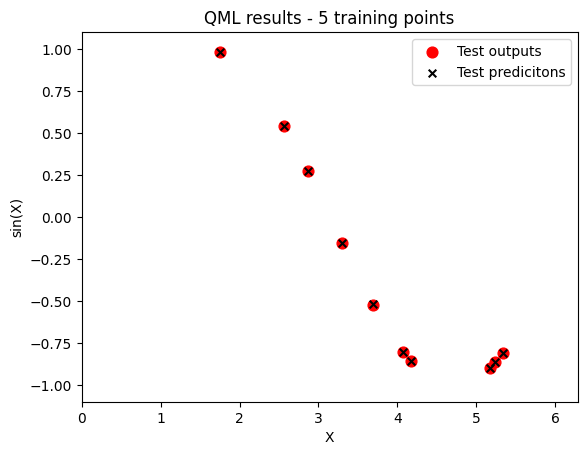

Cost after step 2: 0.5826703213944125
Cost after step 4: 0.1436335059349911
Cost after step 6: 0.0025232335996258465
Cost after step 8: 5.802038182312915e-05
Cost after step 10: 1.7563270777097046e-06
Cost after step 12: 4.763882837572426e-07
Cost after step 14: 4.467970260300571e-07
Cost after step 16: 4.456377945829418e-07
Cost after step 18: 4.4512588538499163e-07
Cost after step 20: 4.4462950847501676e-07
Cost after step 22: 4.4413429570587195e-07
Cost after step 24: 4.436399185102357e-07
Cost after step 26: 4.4314636760507994e-07
Cost after step 28: 4.426536409788048e-07
Cost after step 30: 4.4216173679123093e-07


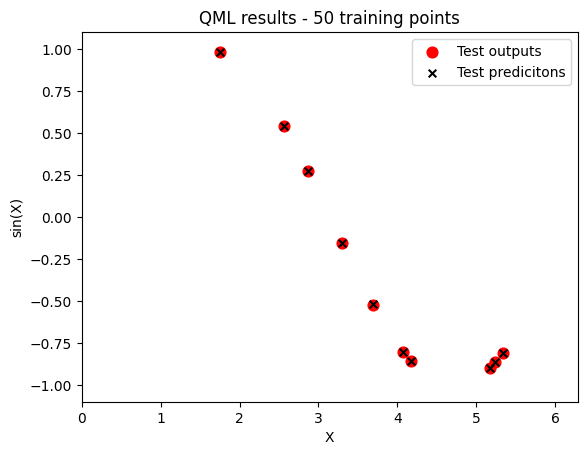

Cost after step 2: 0.5723714491802927
Cost after step 4: 0.13796053277874268
Cost after step 6: 0.003601750343217729
Cost after step 8: 9.220830968689314e-05
Cost after step 10: 2.7581580359107536e-06
Cost after step 12: 4.883929127778487e-07
Cost after step 14: 4.3035356507624414e-07
Cost after step 16: 4.2841994928288983e-07
Cost after step 18: 4.279103378852567e-07
Cost after step 20: 4.274376124700932e-07
Cost after step 22: 4.2696658382109046e-07
Cost after step 24: 4.264963575388957e-07
Cost after step 26: 4.260269092481048e-07
Cost after step 28: 4.255582366577786e-07
Cost after step 30: 4.2509033804305104e-07


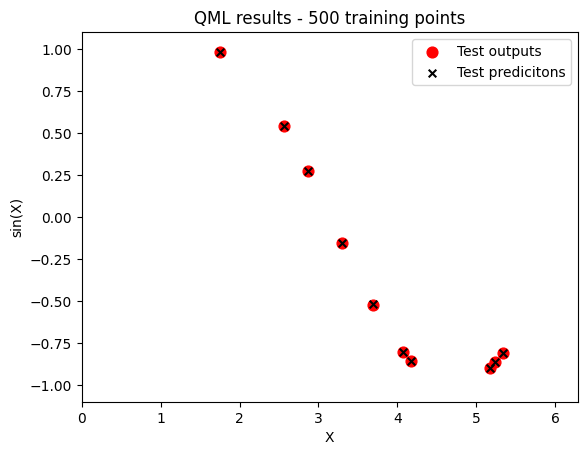

In [134]:
steps = 30
delta = 0.1
results = {}

for x, y in zip(X, Y):
    params = initial_params
    for i in range(steps):
        params, _, _, _, = optimizer.step(cost_function, params, x, y, delta)
        if (i + 1) % 2 == 0:
            cost = cost_function(params, x, y, delta)
            print(f"Cost after step {i + 1}: {cost}")
    
    last_cost = cost_function(params, x, y, delta)
    test_pred = (circuit(x_test, params))
    acc = accuracy(test_pred, y_test)
    results[f"{len(x)} inputs"] = [last_cost, acc]

    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.scatter(x_test,y_test, s=60, c='r', marker="o", label='Test outputs')
    ax1.scatter(x_test,test_pred, s=30, c='k', marker="x", label='Test predicitons')
    plt.xlabel("X")
    plt.ylabel("sin(X)")
    plt.axis([0, 2*np.pi, -1.1, 1.1])
    plt.title(f"QML results - {len(x)} training points")

    plt.legend(loc='upper right')
    plt.show()

In [135]:
import pandas as pd
df = pd.DataFrame.from_dict(results, orient='index', columns=['Cost', 'Accuracy'])
display(df)

,Cost,Accuracy
5 inputs,3.176974154415366e-07,1.0
50 inputs,4.4216173679123093e-07,1.0
500 inputs,4.2509033804305104e-07,1.0


### Conclusion

The **key part** of this algorithm is the encoding of the data into de quantum circuit. It can be verified that the model's result is good even with just 5 training data points if the quantum circuit approach is correct.